In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/DATASET FOR CASESTUDY - DATASET FOR CASESTUDY.csv')

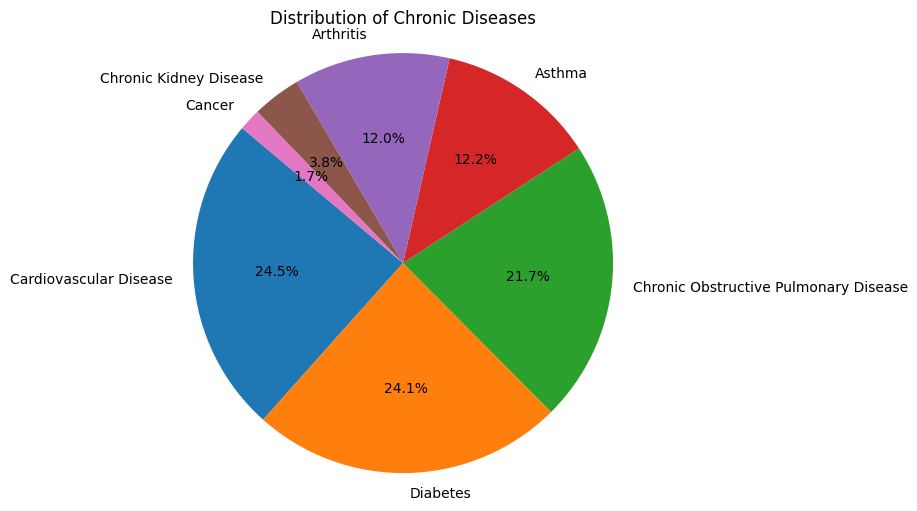

In [5]:
chronic_disease_counts = df['Chronic Diseases'].value_counts()
plt.figure(figsize=(8, 6))
chronic_disease_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Distribution of Chronic Diseases')
plt.ylabel('')
plt.axis('equal')
plt.show()

The composition of Diabetic patients are 24.1%

The best measure of central tendency to summarize the 'Age in years' column depends on the distribution of the data and whether it is skewed or not

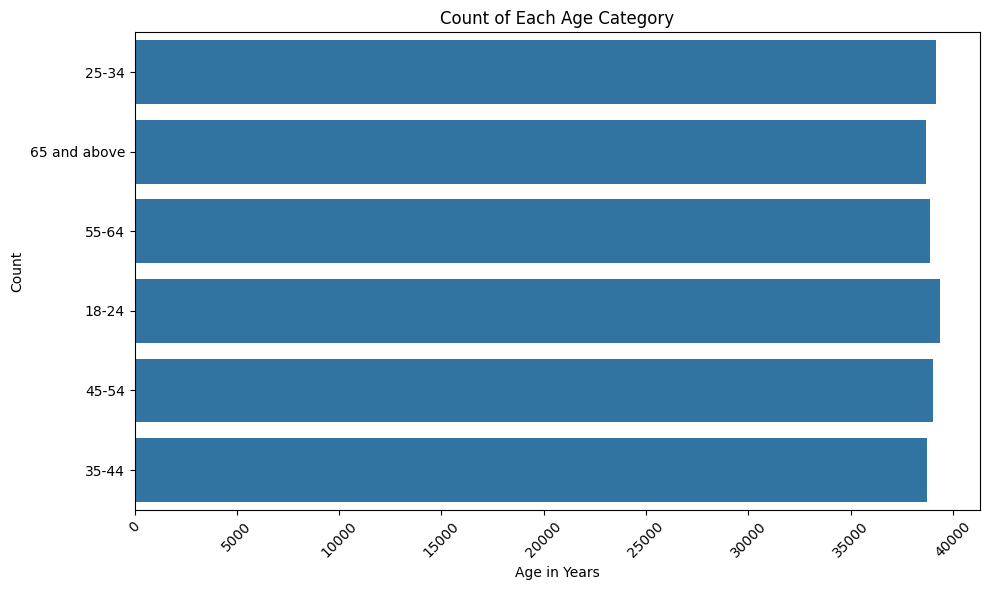

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Age in years'])
plt.title('Count of Each Age Category')
plt.xlabel('Age in Years')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
min_income = df['Income'].min()
max_income = df['Income'].max()

print("Range of income: {} - {}".format(min_income, max_income))

Range of income: 1000.0 - 4999998.0


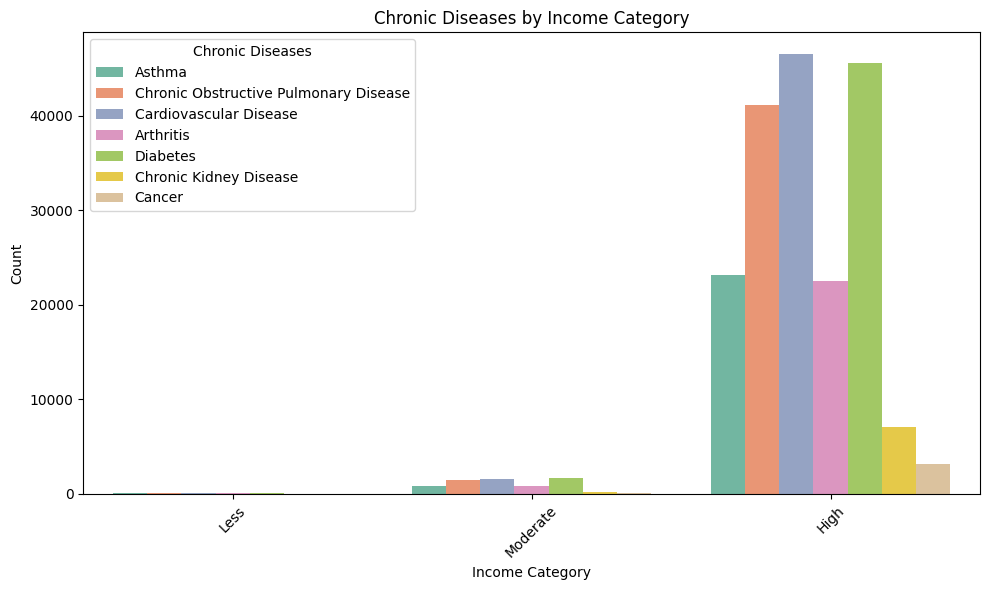

In [22]:
income_bins = {
    'Less': (0, 10000),
    'Moderate': (10001, 100000),
    'High': (100001, 4999998)
}

# Extract bin edges from income_bins
bin_edges = [income_bins[category][0] for category in income_bins.keys()] + [income_bins['High'][1]]

# Bin income data
df['Income Category'] = pd.cut(df['Income'], bins=bin_edges, labels=income_bins.keys())

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='Income Category', hue='Chronic Diseases', data=df, palette='Set2')
plt.title('Chronic Diseases by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Chronic Diseases')
plt.tight_layout()
plt.show()

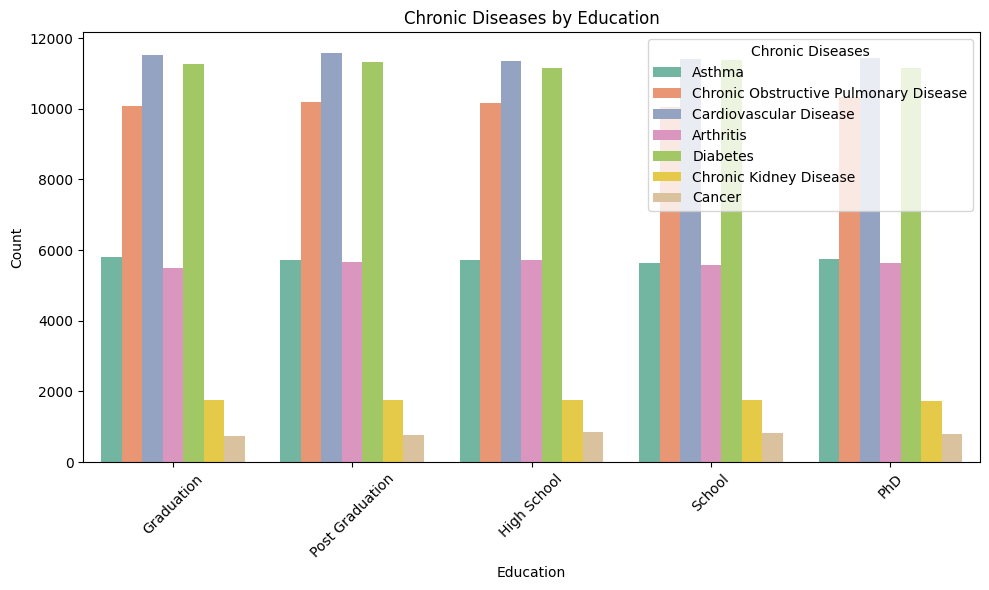

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Chronic Diseases', data=df, palette='Set2')
plt.title('Chronic Diseases by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Chronic Diseases', loc='upper right')
plt.tight_layout()
plt.show()

In [24]:
bins = [1, 5, 8, 15]

# Label the bins
labels = ['Less', 'Moderate', 'Excessive']

# Assign each sleep duration to a bin
df['Sleep Duration Bin'] = pd.cut(df['Sleep duration(Hrs)'], bins=bins, labels=labels, right=False)

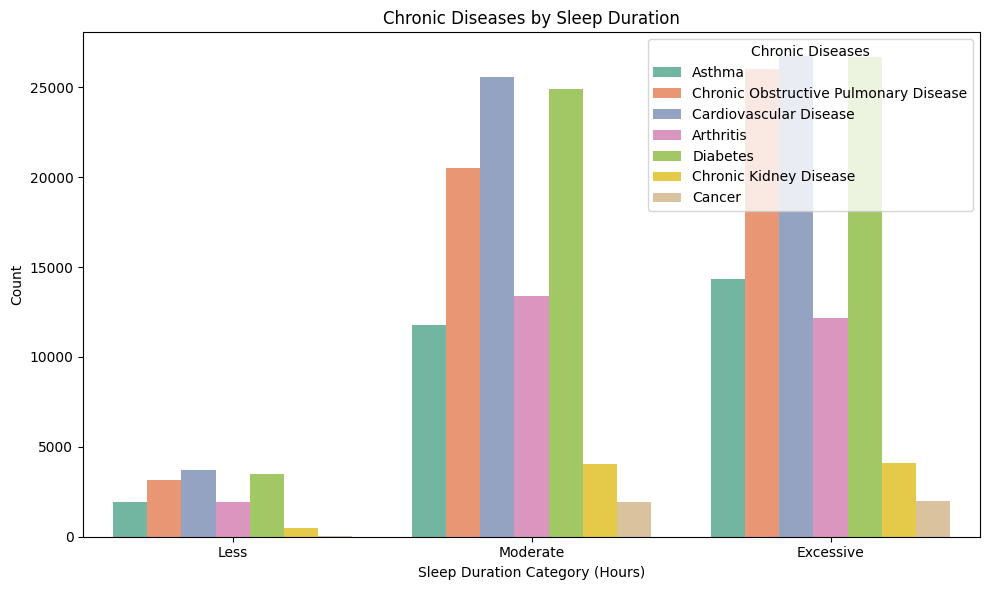

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sleep Duration Bin', hue='Chronic Diseases', data=df, palette='Set2')
plt.title('Chronic Diseases by Sleep Duration')
plt.xlabel('Sleep Duration Category (Hours)')
plt.ylabel('Count')
plt.legend(title='Chronic Diseases', loc='upper right')
plt.tight_layout()
plt.show()

In [28]:
df.head()

,Year,State Abbreviation,Indian States,Chronic Diseases,Family Living Status,GENDER,Age in years,Education,Income,Psychological Health,Psychosocial Factors,Sleep duration(Hrs),Frequency of healthcare visits,Follows a Diet Plan,Obesity / Weight Status,Physical Activity,Income Category,Sleep Duration Bin
0,2021,PB,Punjab,Asthma,Nuclear,Female,25-34,Graduation,2186613.0,Good,Alcohol,7,Quarterly,1,0,0,High,Moderate
1,2019,PB,Punjab,Chronic Obstructive Pulmonary Disease,Roomates,Male,65 and above,Post Graduation,4712953.0,Good,Prescriptive Drugs,6,Annual,1,0,0,High,Moderate
2,2018,MH,Maharashtra,Cardiovascular Disease,Nuclear,Male,55-64,High School,NaN,Bad,Prescriptive Drugs,11,Biannual,1,0,0,NaN,Excessive
3,2018,RJ,Rajasthan,Chronic Obstructive Pulmonary Disease,Nuclear,Female,25-34,High School,NaN,Good,Prescriptive Drugs,12,Episodic Visits,1,0,0,NaN,Excessive
4,2021,UK,Uttarakhand,Arthritis,Nuclear,Female,18-24,High School,NaN,Good,Prescriptive Drugs,10,Biannual,1,0,0,NaN,Excessive


In [31]:
import pandas as pd
from scipy.stats import chi2_contingency
features = ['Psychological Health', 'Education', 'Age in years', 'GENDER']

chi2_results = {}
for feature in features:
    contingency_table = pd.crosstab(df[feature], df['Sleep duration(Hrs)'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[feature] = chi2

sorted_features = sorted(chi2_results, key=chi2_results.get, reverse=True)

print("Features associated with sleep duration (highest priority first):")
for feature in sorted_features:
    print("- {}: {:.2f}".format(feature, chi2_results[feature]))

Features associated with sleep duration (highest priority first):
- Psychological Health: 173.65
- Education: 77.33
- Age in years: 61.85
- GENDER: 11.33


In [35]:
correlations = df.corr()['Sleep duration(Hrs)']
print("Pearson correlation coefficients:")
print(correlations)

Pearson correlation coefficients:
Year                        -0.292966
Income                      -0.011389
Sleep duration(Hrs)          1.000000
Follows a Diet Plan          0.000182
Obesity / Weight Status      0.036120
Physical Activity            0.032030
Psychological Health_Bad     0.001119
Psychological Health_Good   -0.001119
GENDER_Female               -0.000889
GENDER_Male                  0.000889
Name: Sleep duration(Hrs), dtype: float64


<ipython-input-35-e127ddf9b0fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['Sleep duration(Hrs)']


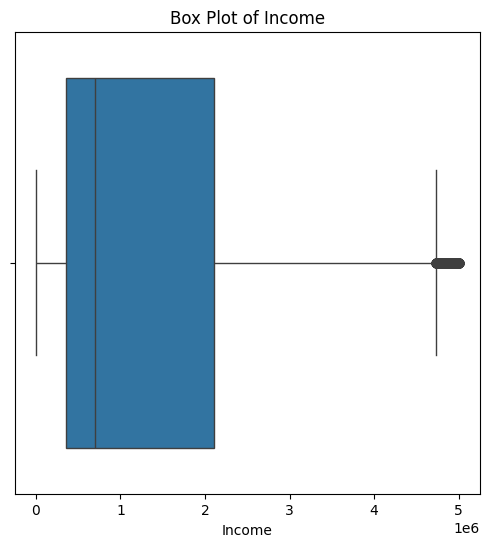

In [37]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['Income'])
plt.title('Box Plot of Income')
plt.xlabel('Income')
plt.show()

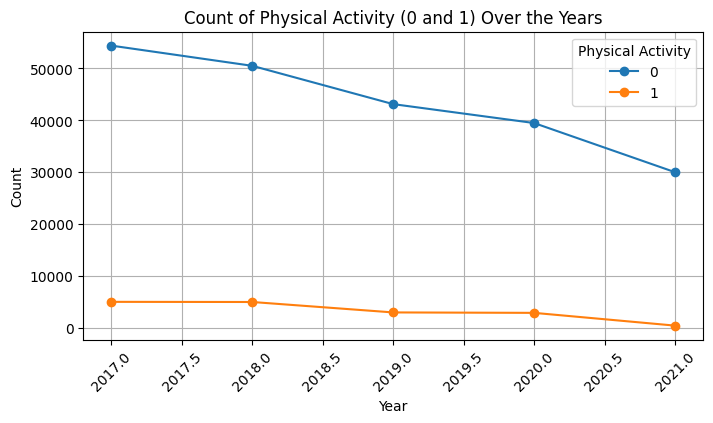

In [40]:
activity_counts = df.groupby(['Year', 'Physical Activity']).size().unstack(fill_value=0)

# Plotting
activity_counts.plot(kind='line', marker='o', figsize=(8,4))
plt.title('Count of Physical Activity (0 and 1) Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Physical Activity')
plt.grid(True)  # Add gridlines
plt.show()

<ipython-input-42-48678bc74dcf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_activity.index, y=state_activity.values, palette='viridis')


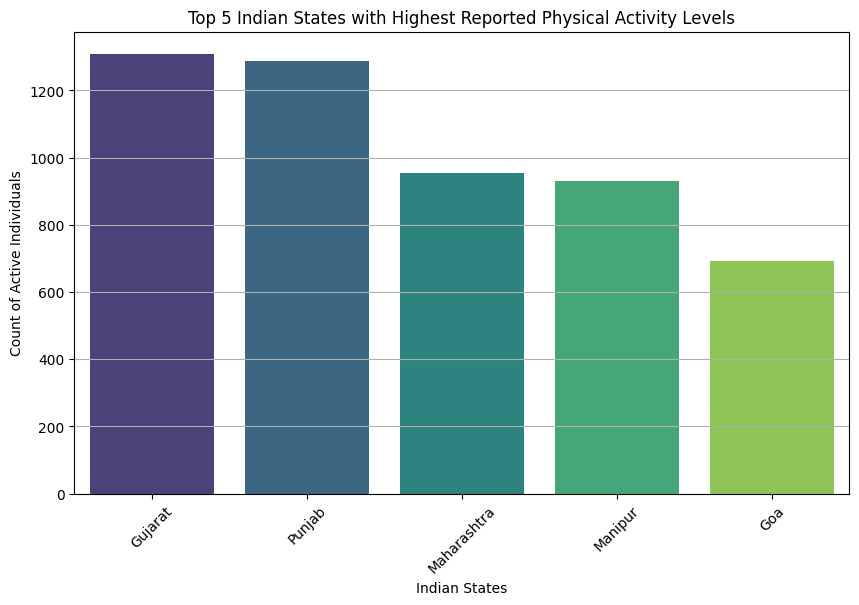

In [42]:
state_activity = df[df['Physical Activity'] == 1].groupby('Indian States').size().sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=state_activity.index, y=state_activity.values, palette='viridis')
plt.title('Top 5 Indian States with Highest Reported Physical Activity Levels')
plt.xlabel('Indian States')
plt.ylabel('Count of Active Individuals')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.show()

In [44]:
import numpy as np

In [49]:
df.head()

,Year,State Abbreviation,Indian States,Chronic Diseases,Family Living Status,Age in years,Education,Income,Psychosocial Factors,Sleep duration(Hrs),...,Obesity / Weight Status,Physical Activity,Income Category,Sleep Duration Bin,Psychological Health_Bad,Psychological Health_Good,GENDER_Female,GENDER_Male,Family Living Status Encoded,Chronic Diseases Encoded
0,2021,PB,Punjab,Asthma,Nuclear,25-34,Graduation,2186613.0,Alcohol,7,...,0,0,High,Moderate,0,1,1,0,1,1
1,2019,PB,Punjab,Chronic Obstructive Pulmonary Disease,Roomates,65 and above,Post Graduation,4712953.0,Prescriptive Drugs,6,...,0,0,High,Moderate,0,1,0,1,2,5
2,2018,MH,Maharashtra,Cardiovascular Disease,Nuclear,55-64,High School,NaN,Prescriptive Drugs,11,...,0,0,NaN,Excessive,1,0,0,1,1,3
3,2018,RJ,Rajasthan,Chronic Obstructive Pulmonary Disease,Nuclear,25-34,High School,NaN,Prescriptive Drugs,12,...,0,0,NaN,Excessive,0,1,1,0,1,5
4,2021,UK,Uttarakhand,Arthritis,Nuclear,18-24,High School,NaN,Prescriptive Drugs,10,...,0,0,NaN,Excessive,0,1,1,0,1,0
